# Ridge regression with kernel trick

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

## Generate the points

In [2]:
mean1 = np.array([0,0])
mean2 = np.array([2,0])

P = np.array([[1,1], [-1,1]]) # matrice de changement de base, pour pencher ma distribution
cov1 = np.dot(np.dot(P, np.array([[0.1,0],[0,1]])), np.linalg.inv(P))
cov2 = np.dot(np.dot(P, np.array([[1,0],[0,0.1]])), np.linalg.inv(P))

In [3]:
x1, y1 = np.random.multivariate_normal(mean1, cov1, 100).T
x2, y2 = np.random.multivariate_normal(mean2, cov2, 100).T
x = np.concatenate([x1, x2])
y = np.concatenate([y1, y2])

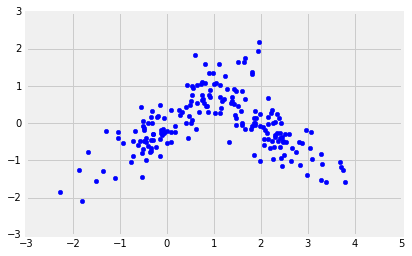

In [4]:
plt.axis([-3,5,-3,3])
plt.scatter(x, y, color="blue")

In [5]:
one = np.ones(len(x)).reshape(len(x), 1) # for the bias

X, y = np.concatenate([one, x.reshape(len(x), 1)], axis=1) , y.reshape(len(y), 1)

## Compute the model

The previous notebook showed that $w = (X^T X + \lambda I)^{-1} X^T Y$. By noticing that $(X^T X + \lambda I)X^T = X^T (X X^T + \lambda I)$ and multiplying both parts of the equation by $(X^T X + \lambda I)^{-1}$ (left) et  $(X X^T + \lambda I)^{-1} Y$ (right), one can rewrite $w = X^T (X^T X + \lambda I)^{-1} Y$. 

Thus, $\hat{y} = w^T \hat{x} = Y^T (X X^T + \lambda I)^{-1} X \hat{x}$

To map x into a greater dimensions space with powers of its coefficients, one can replace the inner product by a kernel : $K_{ij} = k(X_i,X_j)$ and $\kappa_i = k(X_i,\hat{x})$.

The list of kernels can be found at http://crsouza.com/2010/03/17/kernel-functions-for-machine-learning-applications/

In [6]:
def linear_kernel(x1, x2):
    return np.dot(x1, x2)

def polynomial_kernel(x1, x2, d=2):
    return (np.dot(x1, x2) + 1)**d

def gaussian_kernel(x1, x2, gamma=1):
    # experimentally : the bigger gamma is, the higher is the capacity of the model
    return np.exp(-gamma * np.linalg.norm(x1 - x2)**2)

def exponential_kernel(x1, x2, gamma=1):
    return np.exp(-gamma * np.linalg.norm(x1 - x2))

def tanh_kernel(x1, x2, alpha=1):
    # experimentally : the bigger alpha is, the higher is the capacity of the model
    return np.tanh(alpha * np.dot(x1, x2))

def rational_quadratic_kernel(x1, x2, c=1):
    return 1 - (np.linalg.norm(x1 - x2)**2)/(c + np.linalg.norm(x1 - x2)**2)

def power_kernel(x1, x2, d=4):
    return - np.linalg.norm(x1 - x2)**d

def K(X1, X2, kernel=polynomial_kernel):
    return np.array([[kernel(X1[i], X2[j]) for i in range(X1.shape[0])] for j in range(X1.shape[0])])

def kappa(X1, x2, kernel=polynomial_kernel):
    return np.array([kernel(X1[i], x2) for i in range(len(X1))])

In [7]:
S = K(X, X)
lamda = 0.1
print y.shape
print S.shape
print np.linalg.inv(S + lamda * np.eye(len(S)))

(200, 1)
(200, 200)
[[ 9.91499794 -0.08313482 -0.02352309 ..., -0.07993411 -0.08557222
  -0.05505303]
 [-0.08313482  9.91729593 -0.01685636 ..., -0.08115303 -0.08202921
  -0.06437928]
 [-0.02352309 -0.01685636  9.88117391 ..., -0.01033951 -0.03303449
   0.01181886]
 ..., 
 [-0.07993411 -0.08115303 -0.01033951 ...,  9.91846928 -0.0769562
  -0.07453246]
 [-0.08557222 -0.08202921 -0.03303449 ..., -0.0769562   9.91182336
  -0.04332529]
 [-0.05505303 -0.06437928  0.01181886 ..., -0.07453246 -0.04332529
   9.88039547]]


In [8]:
def f(x, S, kernel):
    return np.dot(np.dot(y.transpose(), np.linalg.inv(S + lamda * np.eye(len(S)))), kappa(X, x, kernel=kernel))

def F(x_vect, kernel):
    S = K(X, X, kernel=kernel)
    return np.array([f(x_vect[i], S, kernel) for i in range(len(x_vect))])

## Display the result

In [ ]:
plt.rcParams["figure.figsize"] = (12,12)

new_x = np.concatenate([np.ones(101).reshape(101,1), np.linspace(-4, 5, 101).reshape(101, 1)], axis=1)

y_linear = F(new_x, linear_kernel)
y_poly = F(new_x, polynomial_kernel)
y_gauss = F(new_x, gaussian_kernel)
y_tanh = F(new_x, tanh_kernel)
y_rq = F(new_x, rational_quadratic_kernel)
y_power = F(new_x, power_kernel)

plt.subplot(331)
plt.title("Linear")
plt.axis([-3,5,-3,3])
plt.scatter(x, y)
plt.plot(new_x, y_linear)

plt.subplot(332)
plt.title("Polynomial 2")
plt.axis([-3,5,-3,3])
plt.scatter(x, y)
plt.plot(new_x, y_poly)

plt.subplot(333)
plt.title("Gaussian")
plt.axis([-3,5,-3,3])
plt.scatter(x, y)
plt.plot(new_x, y_gauss)

plt.subplot(334)
plt.title("Tanh")
plt.axis([-3,5,-3,3])
plt.scatter(x, y)
plt.plot(new_x, y_tanh)

plt.subplot(335)
plt.title("Rational quadratic")
plt.axis([-3,5,-3,3])
plt.scatter(x, y)
plt.plot(new_x, y_rq)

plt.subplot(336)
plt.title("Power 4")
plt.axis([-3,5,-3,3])
plt.scatter(x, y)
plt.plot(new_x, y_power)
